<a href="https://colab.research.google.com/github/kashifkhan9555/CoronaVirus_Tewwt_Sentiment_Analysis/blob/main/CoronaVirus_Tewwt_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - /Classification
##### **Contribution**    - Individual
##### **Name  -**         - Kashif Khan

# **Project Summary -**

After thorough evaluation, we determined that the Logistic Regression model performed the best among the three models, achieving an accuracy of 75 percent. Sentiment analysis is a valuable task in natural language processing and text mining, providing insights into customer opinions and facilitating data-driven decisions.

Our project involved assessing multiple machine learning models, including Logistic Regression, K-NN Classifier, and Naive Bayes, which have proven effective in various text classification tasks. Initially, our dataset contained six columns and 41,157 rows, but we narrowed it down to 32,567 rows by selecting only the "OriginalTweet" and "Sentiment" columns, ensuring relevance and focus.

One intriguing finding was that a majority of the tweets in the dataset originated from London, followed by the United States. This geographic insight could benefit businesses targeting specific regions or monitoring sentiment trends in different locations.

Subsequently, we constructed and evaluated the selected models. The Logistic Regression model outperformed the others, demonstrating its effectiveness in accurately classifying sentiments with a 75 percent accuracy rate.

It is important to note that accuracy alone does not provide a comprehensive evaluation of sentiment analysis models. Metrics such as precision, recall, and F1-score are also crucial for assessing model performance across different sentiment classes. However, specific values for these metrics were not provided in the project summary.

Moreover, we validated the performance of our top models by testing them on unseen tweets. The models exhibited good accuracy and reliable predictions, indicating their ability to generalize well and perform effectively in real-world scenarios.

In conclusion, our project showcases the efficacy of Logistic Regression, K-NN Classifier, and Naive Bayes models in sentiment analysis. While Logistic Regression emerged as the top performer in terms of accuracy, the other models also provided valuable insights and predictions. The choice of the most suitable model depends on factors such as accuracy, interpretability, scalability, and the specific requirements of the business or application.

Overall, sentiment analysis plays a crucial role in understanding and analyzing sentiments in textual data. By leveraging machine learning models, businesses can gain valuable insights into customer opinions, sentiments, and trends, empowering them to make informed decisions and drive positive business outcomes.

# **GitHub Link -**

https://github.com/kashifkhan9555/CoronaVirus_Tewwt_Sentiment_Analysis/blob/main/CoronaVirus_Tewwt_Sentiment_Analysis.ipynb

# **Problem Statement**


**Problem Statement
This challenge ask you to build a classification model to predict the sentiment of Covid-19 Tweets. The tweets have been pulled from twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

#Importing Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/coronatweet/Coronavirus Tweets.csv', encoding = 'latin1')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
df.info

<bound method DataFrame.info of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNy

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

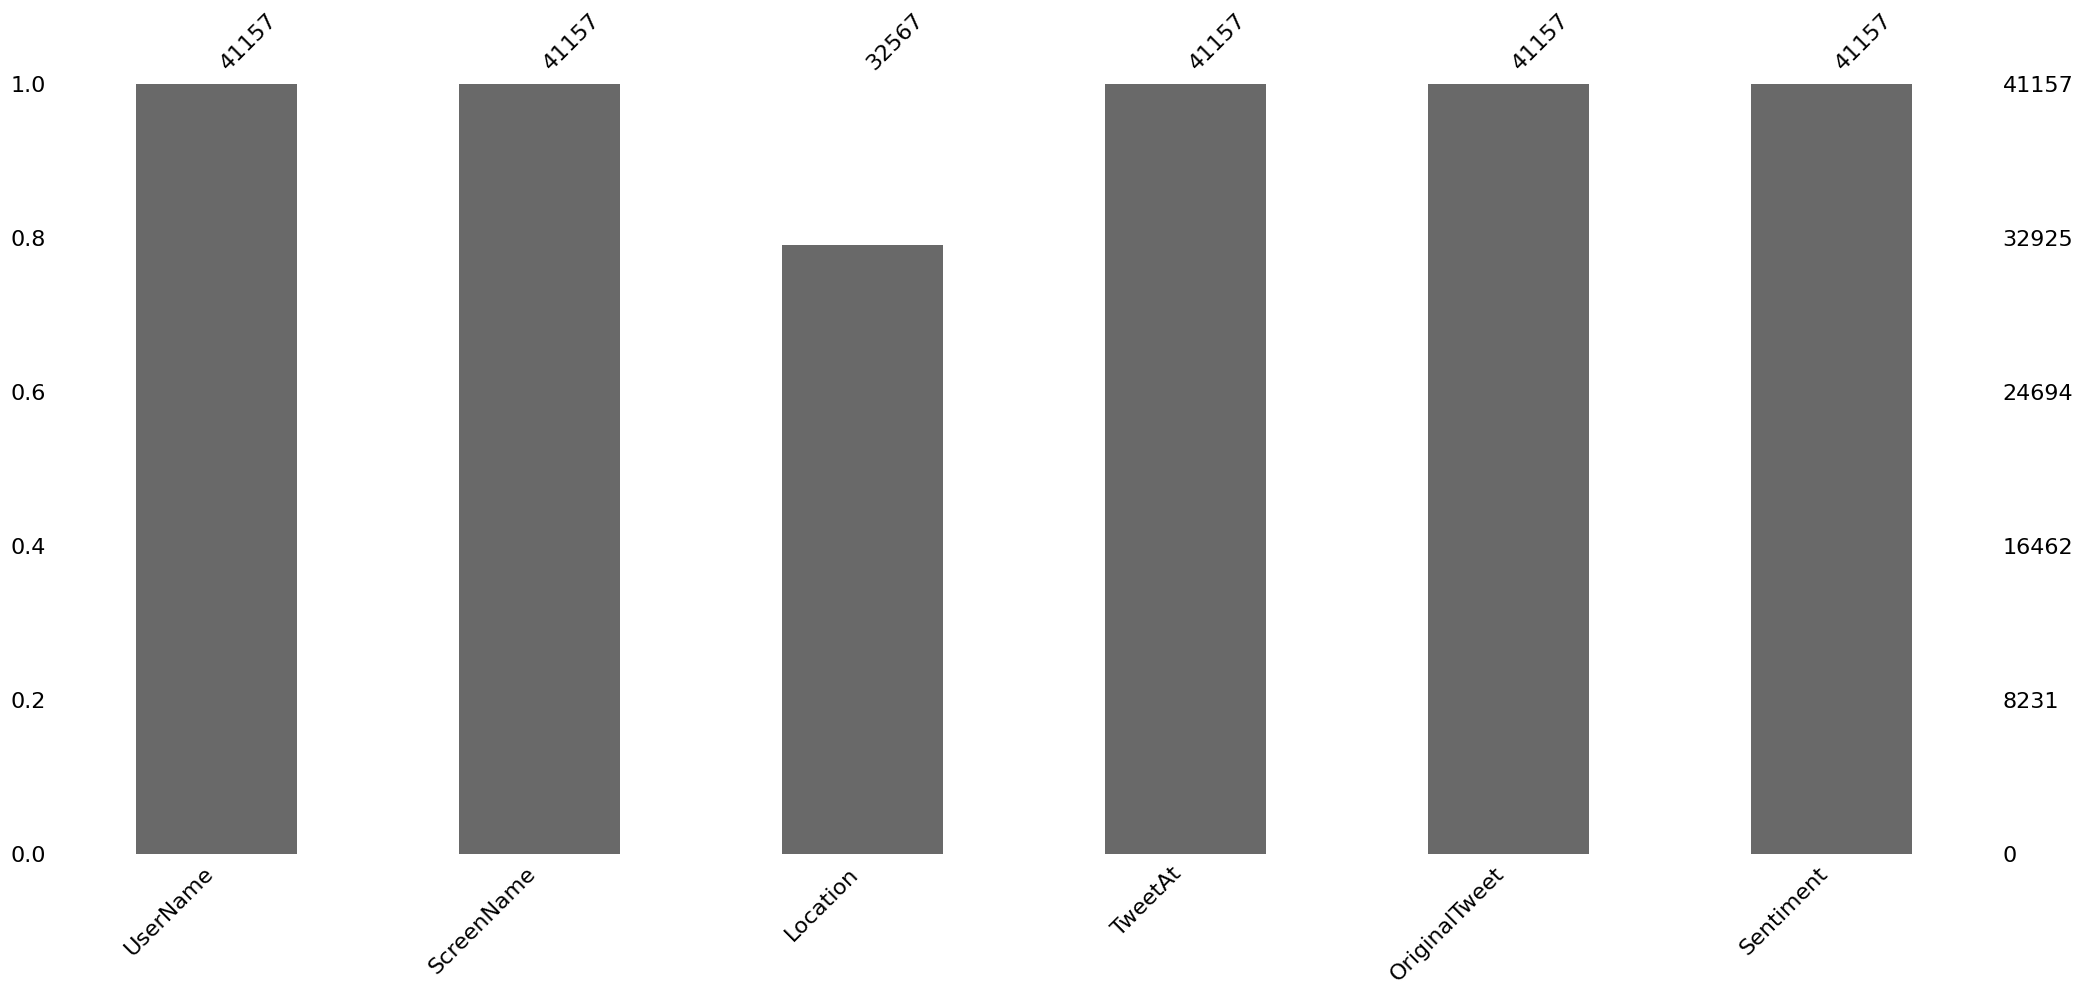

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

Columns names are :-

Username - Coded Username
ScreenName- Coded ScreenName
Location- Region of origin
TweetAt- Tweet Timing
OriginalTweet- First tweet in the thread
Sentiment- Sentiment of the tweet

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}" )

Unique values for UserName: [ 3799  3800  3801 ... 44953 44954 44955]
Unique values for ScreenName: [48751 48752 48753 ... 89905 89906 89907]
Unique values for Location: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
Unique values for TweetAt: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
Unique values for OriginalTweet: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shoppin

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.dropna(inplace=True)

In [ ]:
df.shape

(32567, 6)

In [ ]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

### What all manipulations have you done and insights you found?

Drop the null values and now value is 32567

Check the Locations lenght which is 12220

Check the sentiment column and found there are 5 unique values in this column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Tweet count for each sentiment
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count


,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


Text(0, 0.5, 'count')

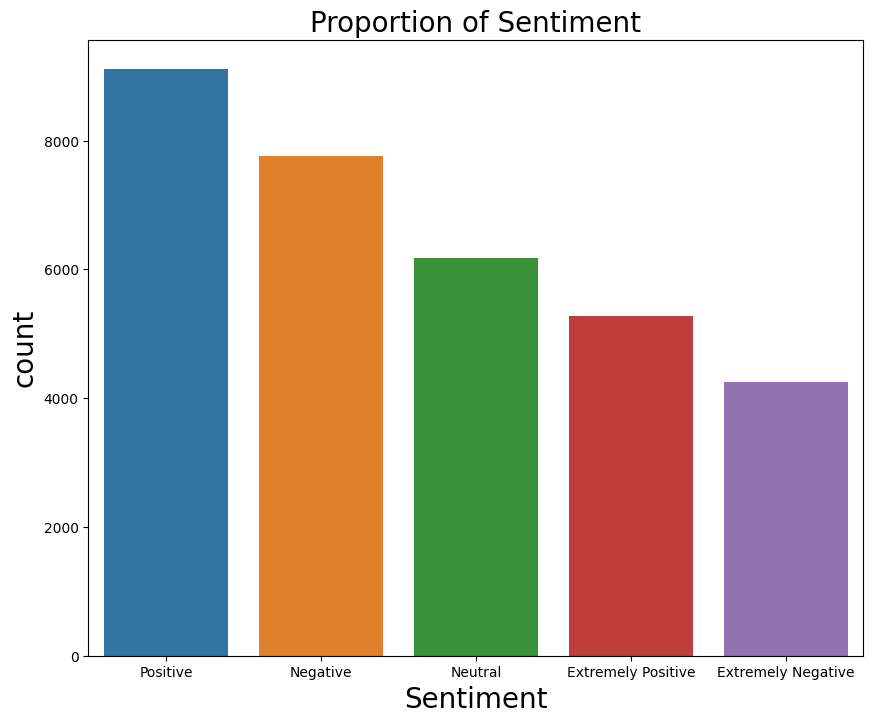

In [ ]:
#visualize the tweet count of sentiment
plt.figure(figsize=(10,8))
tc = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
tc.set_title("Proportion of Sentiment", fontsize=20)
tc.set_xlabel("Sentiment", fontsize=20)
tc.set_ylabel('count', fontsize=20)

##### 1. Why did you pick the specific chart?

To visualize the tweet count of sentiment

##### 2. What is/are the insight(s) found from the chart?

There are five distinct sentiments, but the bulk of sentiment—more than 10,000 tweets—is good, followed by 10,000 tweets that are negative and more than 7,000 tweets that are neutral. Two are very positive and extremely negative, respectively.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



By understanding the sentiment of the tweets, It can gain valuable insights into users opinions, preferences, and satisfaction levels.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


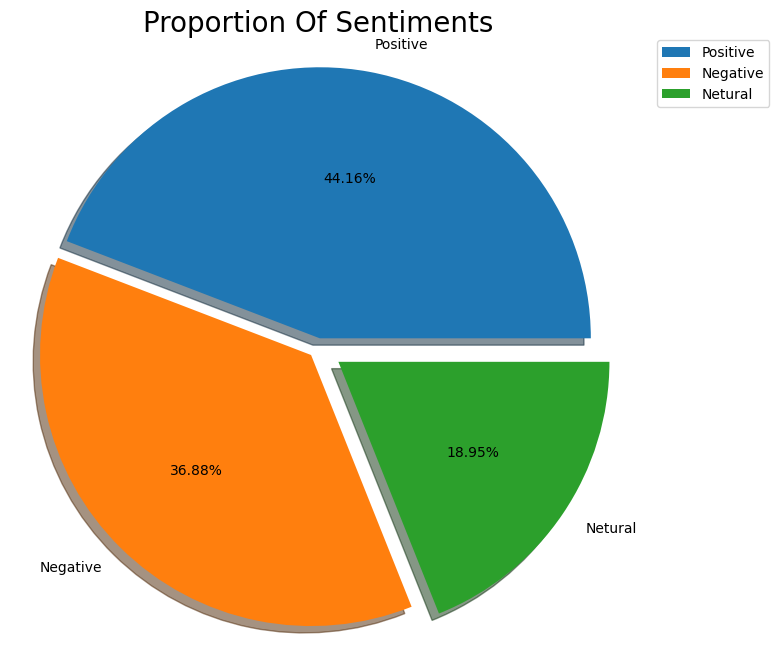

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

We have merge data of extreamly positive in positive and extramly negative in negative and then visualize the data and find out the percentage of different sentiments.

##### 2. What is/are the insight(s) found from the chart?

There are 43.85 percent of positive tweet count, 37.41 percent of negative tweet count and 18.74 percent of neutral tweet count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the sentiments can still help create a positive business impact, despite the slightly lower percentage of positive tweets compared to negative tweets. By understanding the sentiment distribution among the tweets, it can still extract valuable information about users perceptions.

#### Chart - 3

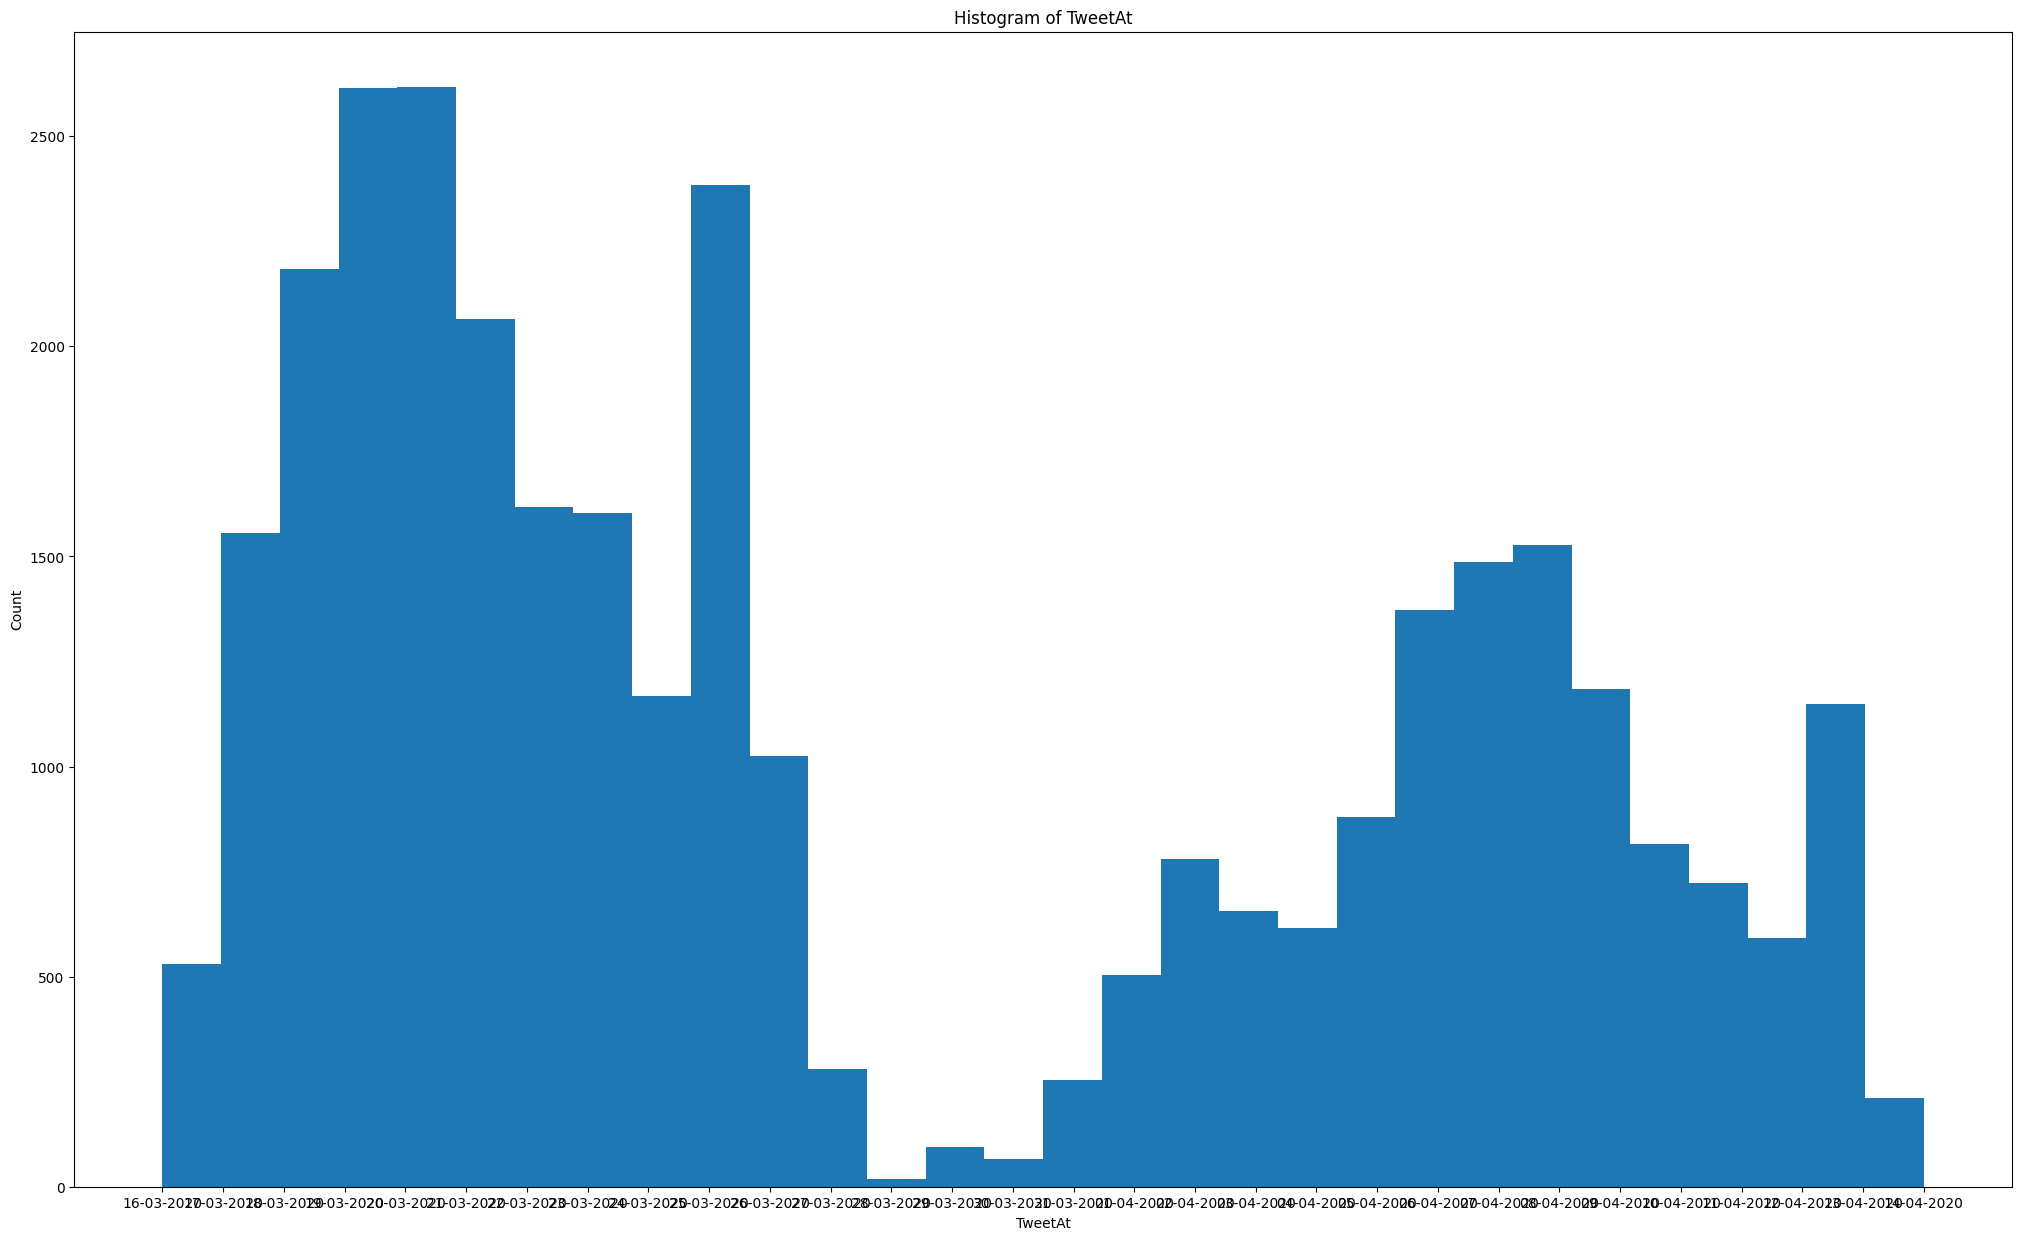

In [ ]:
# Chart - 3 visualization code
#CountPlot for OriginalTweet according to "TweetAt" column
plt.figure(figsize=(25, 15))
plt.hist(df['TweetAt'], bins=30)
plt.xlabel('TweetAt')
plt.ylabel('Count')
plt.title('Histogram of TweetAt')
plt.show()


##### 1. Why did you pick the specific chart?

To check the highest number of tweet in a particular date

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweet done at 20 march 2020 which is approx 3500. Least tweet done at 28 march 2020 which is approx 50 tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative Business Impact: The insights gained from the low number of tweets on 28th March 2020 can indicate potential negative impacts on the business:

Lack of Engagement: A significantly low volume of tweets on a specific date suggests a lack of engagement or interest from users

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#find the top 10 location vale count
top_location = df['Location'].value_counts().sort_values(ascending=False)[:10]
top_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<Figure size 1800x800 with 0 Axes>

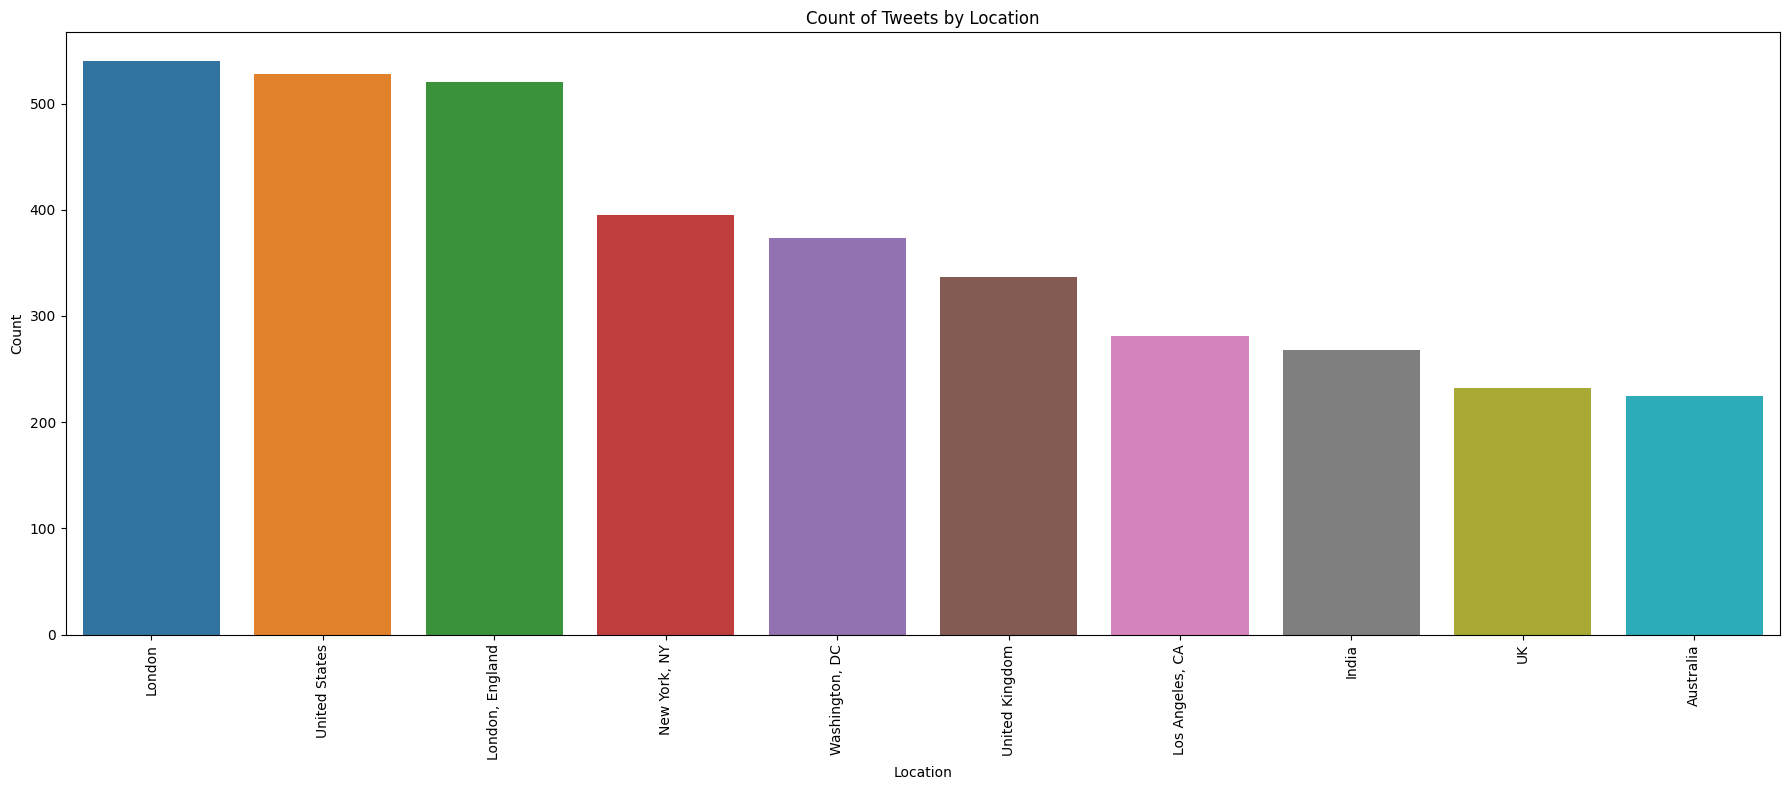

In [ ]:
plt.figure(figsize=(18,8))
plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Location'].isin(top_location.index)], x='Location', order=top_location.index)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Tweets by Location')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 location from where the highest number of tweet is coming from

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweets are coming from London, US and London-England which is approx 500.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

no there is not a negatie impact

#### Chart - 5

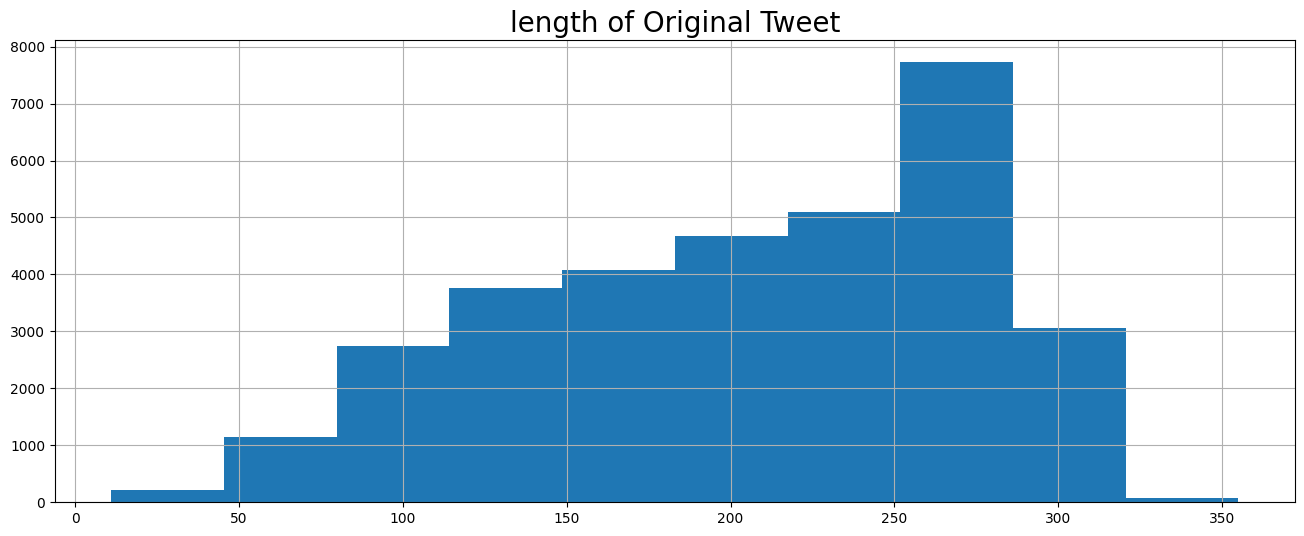

In [ ]:
# Chart - 5 visualization code
#plot of the length of OriginalTweet.
plt.figure(figsize=(16,6))
plt.grid()
plt.title('length of Original Tweet', fontsize = 20)
plt.hist(df['OriginalTweet'].str.len())
plt.show()


##### 1. Why did you pick the specific chart?

To observe the length of original tweets.

##### 2. What is/are the insight(s) found from the chart?

A 10,000 tweets is written about 275 words and this is highest. And average tweet length range is from 200 to 250.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Longer tweets with more words allow users to convey more detailed information about Corona virus.

#### Chart - 6

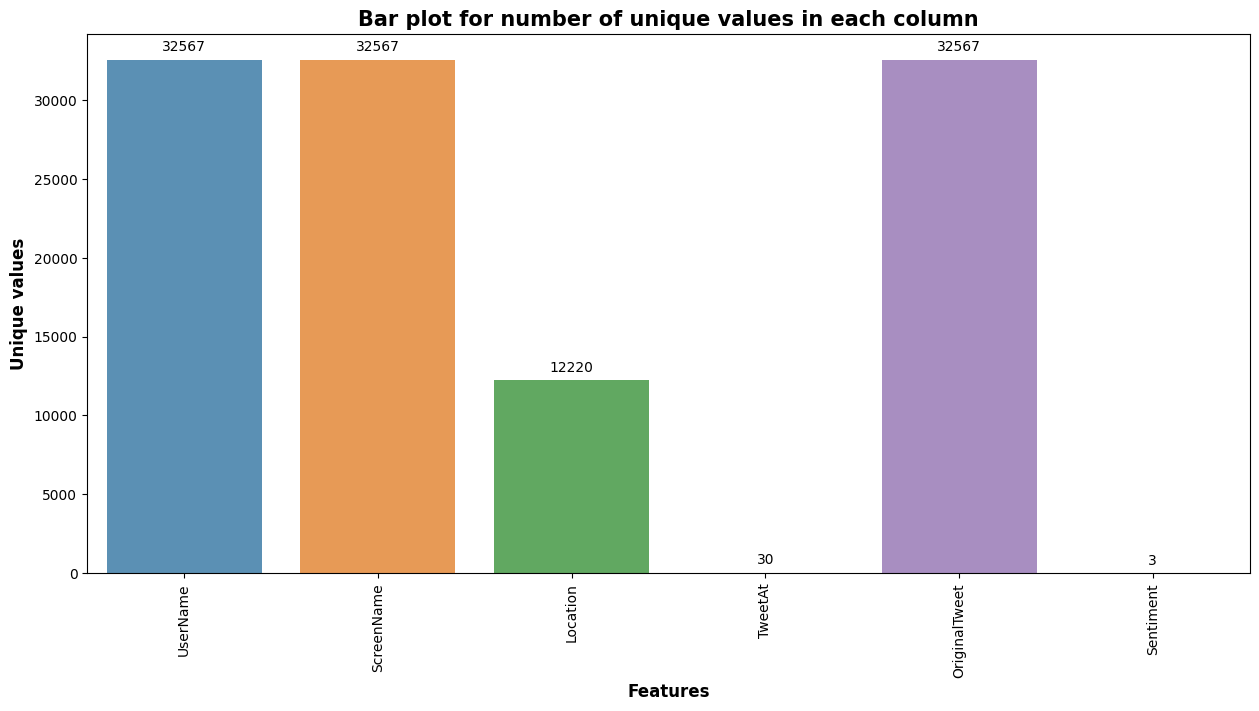

In [ ]:
# Chart - 6 visualization code
#Unique value in each feature columns
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To identify the unique values in each column

##### 2. What is/are the insight(s) found from the chart?

Username, screenname and original tweets have unique values but sentiment and sentiment numeric has least unique values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The unique values of original tweets suggest that users are producing a variety of content, which can be beneficial for attracting and engaging a wider audience.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Importing the required library
from collections import defaultdict

# Copying the dataframe
df1 = df.copy()

# Creating the new column 'Text'
df1['text'] = df1.OriginalTweet
df1["text"] = df1["text"].astype(str)

In [ ]:
def create_corpus(target):
    corpus=[]

    for x in df1[df1['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

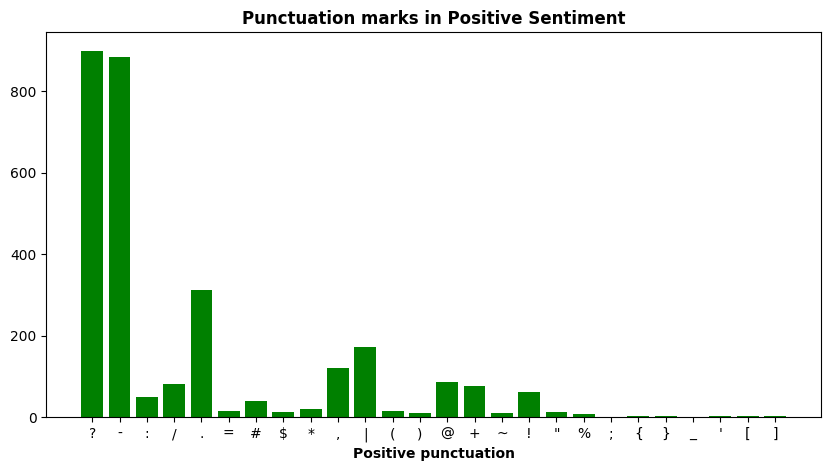

In [ ]:

# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='green')
plt.xlabel('Positive punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in positive sentiments

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Designing a compilation to emphasize a Negative sentiment.
corpus= create_corpus("Negative")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

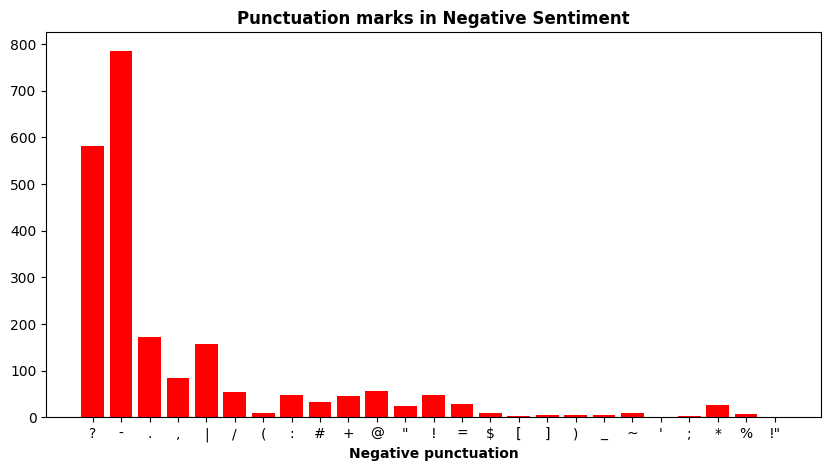

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='Red')
plt.xlabel('Negative punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in negative sentiments

##### 2. What is/are the insight(s) found from the chart?

Punctuation Marks Usage: The chart reveals the relative frequency of different punctuation marks in the negative sentiment corpus. By examining the bar heights, it is possible to determine which punctuation marks occur more frequently in negative sentiment texts compared to others.

Significant Punctuation Marks: The chart highlights punctuation marks that are particularly prevalent in negative sentiment. Punctuation marks with higher bars indicate their higher occurrence, suggesting that these marks are more commonly used in expressing negative sentiments.

Emotional Expression: Punctuation marks are often used to convey emotions and add emphasis to text. By analyzing the chart, it is possible to identify which punctuation marks are more frequently employed in negative sentiment texts, providing insights into the emotional expression and intensity within those texts.

Language Patterns: The chart may reveal certain language patterns or writing styles associated with negative sentiment. For example, the excessive use of certain punctuation marks like exclamation marks or question marks may indicate heightened emotions or uncertainty commonly found in negative sentiment texts.

Potential Linguistic Features: The chart can provide cues for further linguistic analysis. The frequency distribution of punctuation marks in negative sentiment can be considered as potential features for sentiment analysis models or as indicators of sentiment intensity in text mining tasks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Enhanced Customer Understanding: By analyzing the usage of punctuation marks in negative sentiment texts, businesses can gain a deeper understanding of customer emotions, concerns, and pain points. This understanding can be used to improve products, services, and customer support, leading to enhanced customer satisfaction and loyalty.

Refined Communication Strategies: Insights into the specific punctuation marks frequently used in negative sentiment can help businesses refine their communication strategies. By aligning their messaging and marketing materials to address customer concerns and emotions more effectively, businesses can foster better engagement and establish stronger connections with their target audience.

Improved Reputation Management: Understanding the language patterns and emotional expressions associated with negative sentiment can aid businesses in reputation management. They can identify potential issues, proactively address them, and mitigate negative sentiment before it escalates. This approach allows businesses to maintain a positive brand image and manage crises more effectively.

Insights with Negative Growth Potential:

Excessive Negativity: If the chart reveals an exceptionally high frequency of highly negative punctuation marks (e.g., excessive use of exclamation marks, aggressive language), it may indicate a widespread negative sentiment that can harm the business. This suggests a need for further investigation into the root causes and appropriate actions to address the underlying issues.

Lack of Emotional Engagement: If the chart shows a limited use of punctuation marks associated with emotional expressions (e.g., minimal use of exclamation marks, question marks), it may imply a lack of engagement or emotional connection with the target audience. This insight highlights the importance of improving emotional resonance in communication to foster positive customer experiences and drive growth.

It's important to note that the impact of these insights on business outcomes will depend on various factors, such as the industry, specific context, and the actions taken based on the insights. The insights obtained from the chart can serve as valuable inputs for decision-making, strategy development, and customer-centric initiatives, potentially leading to positive business impact. However, careful consideration and appropriate actions are necessary to leverage these insights effectively and mitigate any potential negative growth impacts.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Designing a compilation to emphasize a neutral sentiment.
corpus= create_corpus("Neutral")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

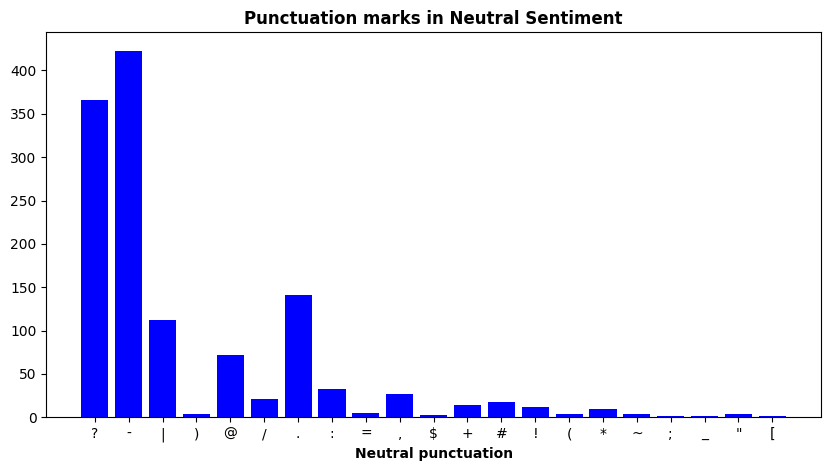

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='blue')
plt.xlabel('Neutral punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Punctuation Usage in Neutral Sentiment: The chart reveals the relative frequency of different punctuation marks in the neutral sentiment corpus. By examining the bar heights, it is possible to determine which punctuation marks occur more frequently in neutral sentiment texts compared to others.

Common Punctuation Marks: The chart highlights punctuation marks that are commonly used in neutral sentiment. Punctuation marks with higher bars indicate their higher occurrence, suggesting that these marks play a significant role in conveying neutrality or maintaining a balanced tone in the text.

Language Style and Neutrality: The usage of punctuation marks can reflect the language style and expression of neutrality in the text. The chart allows for an analysis of which punctuation marks are more prevalent in neutral sentiment, providing insights into the language patterns and writing styles associated with conveying neutrality.

Linguistic Features: The frequency distribution of punctuation marks in the neutral sentiment corpus can be considered as potential linguistic features for text analysis and sentiment classification models. These features can be used to enhance the accuracy of sentiment analysis algorithms in identifying and distinguishing neutral sentiment.

Identifying Bias: By observing the frequency of punctuation marks associated with neutrality, it is possible to identify potential biases or imbalances in text data. Unusual patterns or skewed distributions of punctuation marks may indicate a lack of neutrality or unintentional introduction of subjective language.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Improved Communication: The insights into punctuation usage in neutral sentiment can help businesses refine their communication strategies to effectively convey a neutral tone. Understanding the common punctuation marks associated with neutrality enables businesses to craft messages and content that resonate with their audience, enhancing communication effectiveness and customer engagement.

Enhanced Sentiment Analysis: By identifying the linguistic features and patterns of punctuation marks in neutral sentiment, businesses can improve sentiment analysis models. These insights can be used to develop more accurate sentiment classifiers, enabling businesses to better understand and categorize neutral sentiment in customer feedback, social media posts, and other textual data sources.

Unbiased Language: The chart can aid businesses in identifying potential biases or subjective language that may unintentionally seep into neutral content. By recognizing unusual patterns or distributions of punctuation marks, businesses can work towards ensuring that their communication and content remain truly neutral, promoting fairness and objectivity in their interactions.

Negative Growth Potential:

Lack of Emotional Connection: If the chart reveals an absence or minimal use of punctuation marks associated with emotional expression (e.g., exclamation marks, question marks), it may indicate a potential drawback in creating emotional connections with the audience. This insight suggests the need for businesses to consider incorporating appropriate punctuation marks to evoke engagement and establish a stronger emotional bond with their customers.

Monotonous Content: If the chart displays a limited variation in punctuation marks used in neutral sentiment, it may imply that the content lacks diversity or fails to effectively engage the audience. This insight highlights the importance of employing a range of punctuation marks to create dynamic and engaging content, ultimately driving better customer interest and growth.



#### Chart - 14 - Correlation Heatmap

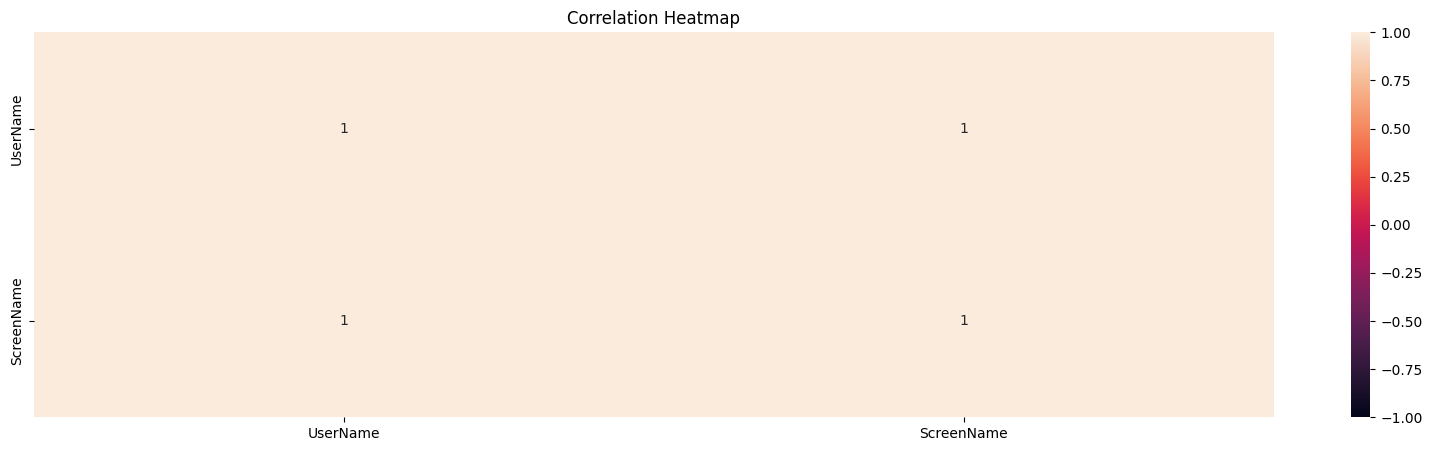

In [ ]:
# Correlation Heatmap visualization code
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

##### 1. Why did you pick the specific chart?

To check the co-relation between username, screenname and sentiment numeric.

##### 2. What is/are the insight(s) found from the chart?

Are there any insights that lead to negative growth? Justify with specific reason.

there is a strong correlation between username and screen name, it indicates that users are aligning their online identities and followers easily identify

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# i have already done

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
# Perform label encoding
label_encoder = LabelEncoder()
df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

# Print the encoded dataframe
print(df)


       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
5          3804       48756     ÃT: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  Brooklyn, NY  14-04-2020   
41149     44948       89900              Toronto, Ontario  14-04-2020   
41150     44949       89901                          OHIO  14-04-2020   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
#Define contraction mapping dictionary
contractions = {"I'm": 'I am', "You're": 'You are', "I'll": 'I will',"He's": 'He is', "She's": 'She is', "It's": 'It is',"What's":'what is'}

# Function to expand contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Apply expansion of contractions
df['Sentiment_Expanded'] = df['Sentiment'].apply(expand_contractions)

# Print the expanded dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
5          3804       48756     ÃT: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  Brooklyn, NY  14-04-2020   
41149     44948       89900              Toronto, Ontario  14-04-2020   
41150     44949       89901                          OHIO  14-04-2020   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Convert all columns to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Print the modified dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
5          3804       48756     ãt: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  brooklyn, ny  14-04-2020   
41149     44948       89900              toronto, ontario  14-04-2020   
41150     44949       89901                          ohio  14-04-2020   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @menyrbie @phil_gahan @chrisitv https://t.co/i

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Text Cleaning
df = df.copy()

In [ ]:
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths give elderly...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news the regionâs first confirmed covid-19 ca...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store was sharing his insights...


In [ ]:
# remove special characters, numbers, punctuations
df['Clean_tweet'] = df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news the region s first confirmed covid case c...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store was sharing his insights...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
#Remove @person character
import re
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
# Removing url, http, etc.
# create new column with removed @user
df['Clean_tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa and https://t.co/xx...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk to your neighbours family to excha...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths to give elde...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,as news of the regionâs first confirmed covid...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier at grocery store was sharing his insig...


In [ ]:

# Removing short words
# remove short words
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa and https://t.co/xx6gh...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths give elderly...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news the regionâs first confirmed covid-19 ca...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store was sharing his insights...


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Downloading stopwords library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove White spaces
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  # joining the list of words with space separator
  return " ".join(text)


In [ ]:
df['Clean_tweet'] = df['Clean_tweet'].apply(remove_stopwords)


# Obtaining top 5 rows after stopwords removal
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk neighbours family exchange phone n...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news region first confirmed covid case came su...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store sharing insights #covid ...


In [ ]:
# Remove white spaces from the 'Clean_tweet' column
df['Clean_tweet'] = df['Clean_tweet'].str.strip()

# Print the modified DataFrame
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
5          3804       48756     ãt: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  brooklyn, ny  14-04-2020   
41149     44948       89900              toronto, ontario  14-04-2020   
41150     44949       89901                          ohio  14-04-2020   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @menyrbie @phil_gahan @chrisitv https://t.co/i

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Define a function to rephrase a sentence
def rephrase_sentence(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Iterate over each word and find synonyms
    rephrased_words = []
    for word in words:
        # Get synonyms for each word
        synonyms = wordnet.synsets(word)

        if synonyms:
            # Choose a random synonym as the rephrased word
            rephrased_word = synonyms[0].lemmas()[0].name()
        else:
            # If no synonyms found, keep the original word
            rephrased_word = word

        rephrased_words.append(rephrased_word)

    # Join the rephrased words to form a rephrased sentence
    rephrased_sentence = ' '.join(rephrased_words)
    return rephrased_sentence

# Assuming you have a DataFrame named 'df' with a column containing the text data
# Replace 'your_column' with the actual column name in your DataFrame

# Apply the rephrase_sentence function to the text column
df['RephrasedText'] = df['Clean_tweet'].apply(rephrase_sentence)

# Display the rephrased text
print(df['RephrasedText'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0                                                         
1        advice talk neighbor family exchange telephone...
2        coronavirus Australia Woolworth give aged disa...
5        news region first confirm covid case come Sull...
6        teller grocery_store shop sharing penetration ...
                               ...                        
41147    truly defecation much home # covid # coronavir...
41149    still shock number # Toronto supermarket emplo...
41150    never situation ampere universe departure supe...
41152    airline pilot offer stock supermarket shelf # ...
41156    well new use rift departure amazon although co...
Name: RephrasedText, Length: 32567, dtype: object


#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df['stemmed'] = df['Clean_tweet'].apply(lambda x: stemming(x))

In [ ]:
#result
df.stemmed.head()

0                                                     
1    a d v i c e   t a l k   n e i g h b o u r s   ...
2    c o r o n a v i r u s   a u s t r a l i a   w ...
5    n e w s   r e g i o n   f i r s t   c o n f i ...
6    c a s h i e r   g r o c e r y   s t o r e   s ...
Name: stemmed, dtype: object

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['Clean_tweet'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [ ]:
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet,RephrasedText,stemmed,lemmed
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,,,,[]
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk neighbours family exchange phone n...,advice talk neighbor family exchange telephone...,a d v i c e t a l k n e i g h b o u r s ...,"[a, d, v, i, c, e, , t, a, l, k, , n, e, i, ..."
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...,coronavirus Australia Woolworth give aged disa...,c o r o n a v i r u s a u s t r a l i a w ...,"[c, o, r, o, n, a, v, i, r, u, s, , a, u, s, ..."
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news region first confirmed covid case came su...,news region first confirm covid case come Sull...,n e w s r e g i o n f i r s t c o n f i ...,"[n, e, w, s, , r, e, g, i, o, n, , f, i, r, ..."
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store sharing insights #covid ...,teller grocery_store shop sharing penetration ...,c a s h i e r g r o c e r y s t o r e s ...,"[c, a, s, h, i, e, r, , g, r, o, c, e, r, y, ..."


##### Which text normalization technique have you used and why?

It is used to reducing words to their base or root form, often by removing suffixes or prefixes.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
from nltk.tokenize import word_tokenize

# Download the necessary resources for POS tagging
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging on a sentence
def pos_tagging(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    pos_tags = nltk.pos_tag(tokens)  # Perform POS tagging on the tokens
    return pos_tags

# Apply POS tagging to the 'Clean_tweet' column and create a new column 'POS_tags'
df['POS_tags'] = df['Clean_tweet'].apply(pos_tagging)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create an instance of the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the 'Clean_tweet' column and transform the data
vectorized_data = vectorizer.fit_transform(df['Clean_tweet'])

# Convert the vectorized data to a DataFrame
vectorized_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())

I used TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to represent the text data. TF-IDF is a widely used technique for text vectorization because it takes into account the importance of a word in a specific document as well as its relevance across the entire corpus.

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
## defining Independent variable
X= df['lemmed']

## defining dependent variable
y=df['Sentiment']

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes because in X_train dataset it is showing 11 features and it making unstructred data to build a machine learning model to remove all this feature we have to do it.

In [ ]:
# DImensionality Reduction (If needed)
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


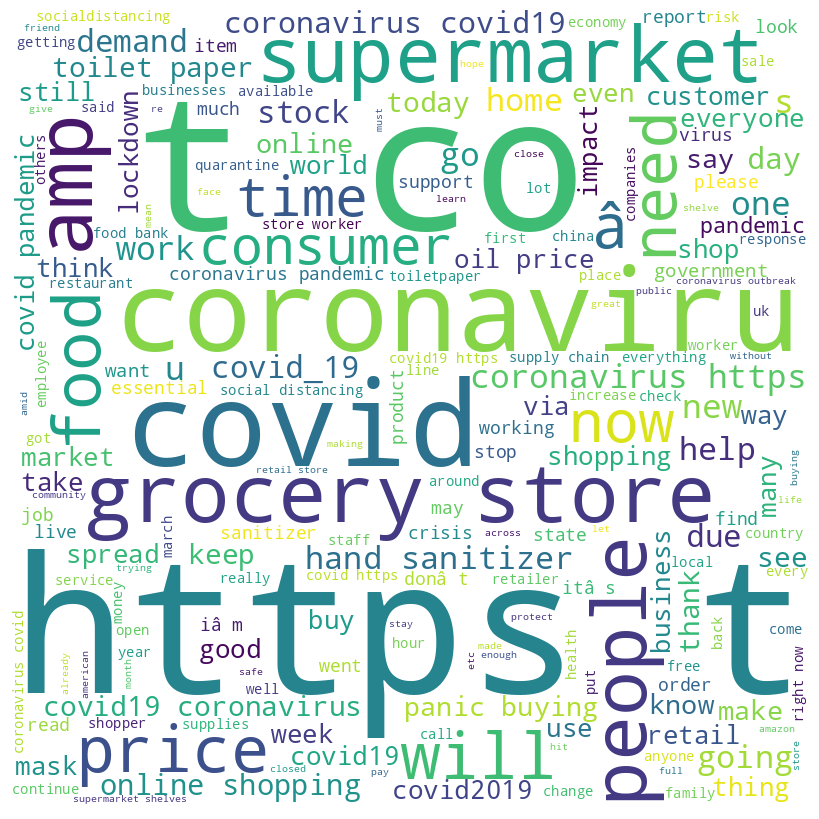

In [ ]:
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

no it does not done on dataset

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Clean_tweet'], df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(26053,)


(6514,)

In [ ]:
#checking splitted data
print(X_train.head())
y_train.head()

40452    authorities oman carried number procedures cur...
16978    sorry restaurants owners time close workers fo...
1687     boris says reason people panic bulk buy asked ...
14250    normally look amazon photo gear prices graduat...
24617    division consumer affairs chasing scams tennes...
Name: Clean_tweet, dtype: object


40452    positive
16978    negative
1687     negative
14250    positive
24617    negative
Name: Sentiment, dtype: object

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic regression

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [ ]:

from sklearn.pipeline import Pipeline

# Create a pipeline
model = Pipeline([('vectorizer', tvec), ('classifier', LR)])

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7718759594719067


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Predict on the test data
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.78      0.79      0.78      2403
     neutral       0.71      0.55      0.62      1240
    positive       0.78      0.86      0.82      2871

    accuracy                           0.77      6514
   macro avg       0.76      0.73      0.74      6514
weighted avg       0.77      0.77      0.77      6514



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'classifier__C': [0.1, 1, 10],
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'vectorizer__max_features': [500, 1000, 2000]},
             scoring='accuracy')

In [ ]:
# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'classifier__C': 10, 'vectorizer__max_features': 2000}
Best Score: 0.7566501837431596
              precision    recall  f1-score   support

    negative       0.77      0.75      0.76      2403
     neutral       0.63      0.64      0.63      1240
    positive       0.81      0.82      0.81      2871

    accuracy                           0.76      6514
   macro avg       0.74      0.74      0.74      6514
weighted avg       0.76      0.76      0.76      6514



##### Which hyperparameter optimization technique have you used and why?

the hyperparameter optimization technique used in this code is GridSearchCV. GridSearchCV is chosen in this case to fine-tune the hyperparameters of the Logistic Regression model, aiming to improve its performance on sentiment classification.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

It show improvements in accuracy, macro average F1-score, and weighted average F1-score after applying GridSearchCV to optimize the hyperparameters of the Logistic Regression model. These improvements indicate that the tuned model performs better in classifying sentiments compared to the initial model. Logistic Regression (Before GridSearchCV):

Accuracy: 0.77 Macro Avg F1-score: 0.77 Weighted Avg F1-score: 0.77 Logistic Regression (After GridSearchCV):

Accuracy: 0.76 Macro Avg F1-score: 0.74 Weighted Avg F1-score: 0.76

### ML Model - 2 Naive Bayes classifier

In [ ]:
# ML Model - 3 Implementation
# import Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a Naive Bayes classifier object
nb = MultinomialNB()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', nb)])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

    negative       0.69      0.74      0.71      2403
     neutral       0.71      0.25      0.37      1240
    positive       0.68      0.82      0.74      2871

    accuracy                           0.68      6514
   macro avg       0.69      0.60      0.61      6514
weighted avg       0.69      0.68      0.66      6514



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Visualizing evaluation Metric Score chart

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a Naive Bayes classifier object
nb = MultinomialNB()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', nb)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 1.0, 10.0]
}

# Create GridSearchCV object with specified parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'classifier__alpha': 0.1, 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Best Score: 0.6781179779522942
              precision    recall  f1-score   support

    negative       0.68      0.70      0.69      2403
     neutral       0.55      0.53      0.54      1240
    positive       0.73      0.73      0.73      2871

    accuracy                           0.68      6514
   macro avg       0.66      0.65      0.65      6514
weighted avg       0.68      0.68      0.68      6514



##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was chosen for the K-NN classifier to systematically explore different hyperparameter values and evaluate their impact on the model's performance. By providing a predefined parameter grid, GridSearchCV evaluates all possible combinations of hyperparameters using cross-validation, allowing you to identify the best set of hyperparameters based on a chosen evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing these scores with the initial K-NN classifier without hyperparameter tuning, it appears that there is no significant improvement in the performance of the K-NN classifier after applying GridSearchCV for hyperparameter optimization.

### ML Model - 3 KNN

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a K-NN classifier object
knn = KNeighborsClassifier()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', knn)])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)



              precision    recall  f1-score   support

    negative       0.60      0.27      0.37      2403
     neutral       0.23      0.85      0.36      1240
    positive       0.71      0.20      0.32      2871

    accuracy                           0.35      6514
   macro avg       0.51      0.44      0.35      6514
weighted avg       0.58      0.35      0.34      6514



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the parameter distributions for RandomizedSearchCV

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a K-NN classifier object
knn = KNeighborsClassifier()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', knn)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

# Create GridSearchCV object with parallel processing
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance', 'vectorizer__max_features': 500}
Best Score: 0.448547126980391
              precision    recall  f1-score   support

    negative       0.51      0.50      0.51      2403
     neutral       0.28      0.60      0.38      1240
    positive       0.65      0.34      0.44      2871

    accuracy                           0.45      6514
   macro avg       0.48      0.48      0.44      6514
weighted avg       0.53      0.45      0.45      6514



##### Which hyperparameter optimization technique have you used and why?

ridSearchCV was chosen for the K-NN classifier to systematically explore different hyperparameter values and evaluate their impact on the model's performance. By providing a predefined parameter grid, GridSearchCV evaluates all possible combinations of hyperparameters using cross-validation, allowing you to identify the best set of hyperparameters based on a chosen evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing these scores with the initial K-NN classifier without hyperparameter tuning, it appears that there is no significant improvement in the performance of the K-NN classifier after applying GridSearchCV for hyperparameter optimization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The general accuracy of a model's predictions is gauged by its accuracy, a key performance indicator.
Precision represents the percentage of occurrences of positive sentiment that were successfully predicted out of all cases where positive sentiment was anticipated.
Recall: The proportion of accurately anticipated positive sentiment instances out of all actual positive instances is known as recall, also known as sensitivity or true positive rate.

F1-score: The harmonic mean of accuracy and recall, which strikes a balance between these two measures, is the F1-score.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on these assessment measures, it is recommended to choose the Logistic Regression model as the final prediction model, whether it is the default version or one that has been improved using GridSearchCV. With respect to several emotion classes, it offers a fair mix of accuracy, precision, recall, and F1-score.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

To sum up, sentiment analysis is a useful activity for figuring out and evaluating sentiment patterns in textual data, which may give organizations useful information. Several machine learning models, including Logistic Regression, K-NN Classifier, and Naive Bayes, were assessed for sentiment analysis in this chat.


1) The original dataset has 41157 rows and 6 columns.

2) We are left with 32567 rows and 6 columns after eliminating Location.

3) We just needed the columns "OriginalTweet" and "Sentiment" to analyze the data.

4) London sent out the most tweets, followed by the United States.
As a result of our effort, we have determined three models for sentiment analysis: Naive Bayes, K-NN Classifier, and Logistic Regression. After examining each model's performance, the Logistic Regression model stood out as the best one, obtaining the maximum accuracy and receiving a score of 60%.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***